In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('placement.csv')

In [4]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [5]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


# here Unnamed column is unnecessary

In [9]:
df.shape #shape 100 student data there

(100, 4)

# Steps

## 0. Preprocess + EDA + Feature Selection
## 1. Extract input and output cols
## 2. Scale the values
## 3. Train test split (cross validation)
## 4. Train the model
## 5. Evaluate the model/model selection
## 6. Deploy the model

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


## So there is no null value. But unnecessary column Unnamed Column

So we remove that column. This steps called data pre processing.

In [11]:
df = df.iloc[:,1:]

In [13]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


# EDA -> Visualization part

In [14]:
import matplotlib.pyplot as plt

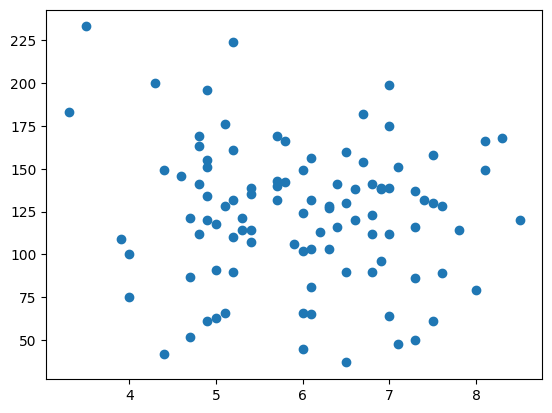

In [15]:
plt.scatter(df['cgpa'],df['iq'])

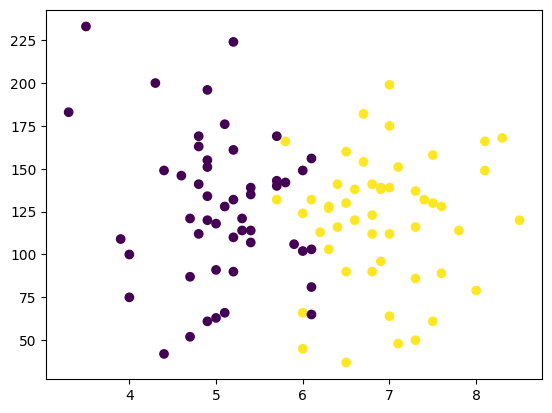

In [17]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement']) # yellow color got the placement


# From the visualization we can apply the Logistic regression method to build ML MODEL.

### This one is small project so feature selection not needed.

## 1. Extract input and output cols


Here cgpa and iq are independent variable and placement is dependent variable.

In [18]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [37]:
X #independent variable

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [25]:
X.shape

(100, 2)

In [38]:
y # dependent variable

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [24]:
y.shape

(100,)

## 3. Train test split (cross validation)
step 02 we will do next step

In [26]:
from sklearn.model_selection import train_test_split


In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1) #0.1 means 10% data go in test set

In [29]:
X_train

,cgpa,iq
99,6.2,113.0
83,7.5,130.0
57,6.5,130.0
37,8.1,149.0
46,5.3,114.0
...,...,...
45,6.0,66.0
6,5.7,143.0
53,8.3,168.0
59,4.8,112.0


In [30]:
X_test

,cgpa,iq
75,4.8,169.0
74,6.7,154.0
43,6.8,141.0
63,6.3,128.0
39,4.6,146.0
44,7.5,61.0
16,5.2,224.0
7,5.0,63.0
96,4.4,42.0
15,5.1,176.0


In [34]:
y_train

99    1
83    1
57    1
37    1
46    0
     ..
45    1
6     0
53    1
59    0
33    0
Name: placement, Length: 90, dtype: int64

In [36]:

y_test

75    0
74    1
43    1
63    1
39    0
44    1
16    0
7     0
96    0
15    0
Name: placement, dtype: int64

## 2. Scale the values

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [41]:
X_train = scaler.fit_transform(X_train)

In [42]:
X_train

array([[ 0.14876393, -0.26145467],
       [ 1.28637049,  0.19106303],
       [ 0.41128852,  0.19106303],
       [ 1.81141967,  0.6968181 ],
       [-0.63880984, -0.23483598],
       [-0.28877705,  0.45724991],
       [-1.5138918 ,  2.05437118],
       [-0.02625246,  0.0313509 ],
       [ 0.67381311,  0.00473221],
       [ 0.84882951, -0.28807336],
       [-2.21395738,  2.93278788],
       [-0.90133443, -0.12836123],
       [ 0.06125574,  0.88314891],
       [-1.77641639, -1.27296481],
       [ 1.1113541 , -0.98015924],
       [ 0.06125574, -1.53915169],
       [ 1.81141967,  1.14933579],
       [ 0.41128852, -0.87368449],
       [-0.28877705,  1.22919185],
       [-0.72631803, -0.34131073],
       [-0.55130164, -0.23483598],
       [ 0.49879672, -0.07512385],
       [-0.20126885,  0.51048728],
       [-0.72631803,  1.01624235],
       [-0.63880984, -0.04850516],
       [ 1.1113541 , -0.1815986 ],
       [ 0.76132131, -0.71397236],
       [ 1.1113541 , -1.93843201],
       [-0.28877705,

In [43]:
X_test = scaler.transform(X_test)

In [44]:
X_test

array([[-1.07635082,  1.22919185],
       [ 0.58630492,  0.82991154],
       [ 0.67381311,  0.48386859],
       [ 0.23627213,  0.13782565],
       [-1.25136721,  0.61696203],
       [ 1.28637049, -1.64562644],
       [-0.72631803,  2.69321969],
       [-0.90133443, -1.59238906],
       [-1.42638361, -2.15138151],
       [-0.81382623,  1.41552267]])

# 4. Train the model


Logistic Regression use 

In [46]:
from sklearn.linear_model import LogisticRegression


In [47]:
clf = LogisticRegression()


In [48]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

# 5. Evaluate the model/model selection
[Accuracy Find Out]


In [49]:
y_pred = clf.predict(X_test)


In [50]:
y_test

75    0
74    1
43    1
63    1
39    0
44    1
16    0
7     0
96    0
15    0
Name: placement, dtype: int64

In [51]:
from sklearn.metrics import accuracy_score


In [52]:
accuracy_score(y_test,y_pred)

1.0

# 1.0 means 100% accuracy

In [54]:
from mlxtend.plotting import plot_decision_regions


<Axes: >

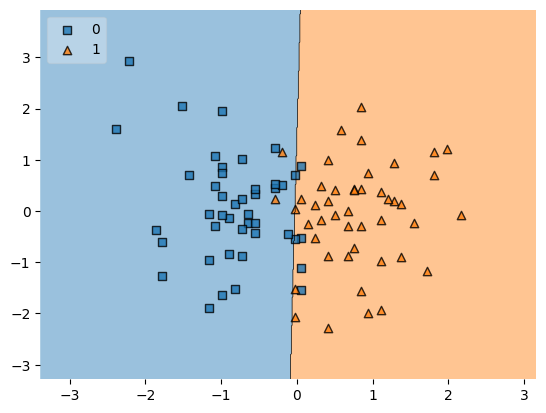

In [55]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)


In [56]:
import pickle


In [57]:
pickle.dump(clf,open('model.pkl','wb'))


# End